In [ ]:
!conda install --yes --prefix {sys.prefix} wordcloud

In [27]:
!conda install --yes --prefix {sys.prefix} xlrd

Channels:
 - conda-forge
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /opt/conda/envs/macrosystems

  added / updated specs:
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    xlrd-2.0.1                 |     pyhd8ed1ab_3          92 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

  xlrd               conda-forge/noarch::xlrd-2.0.1-pyhd8ed1ab_3 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transactio

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import pandas as pd 
import glob
import os
import sys
from wordcloud import WordCloud
import re


In [ ]:
'''Create a dictionary of the state names and abbreviations '''
state_names = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming'
}

In [19]:
'''Load in the xml files to evaluate the grant metadata'''
pathlist = glob.glob('home/nelsbjarke/analyses/NSF_Grant_Data/2023_test/*.xml')

# Load each XML file into a DataFrame and append it to a list
dataframes = [pd.read_xml(file) for file in pathlist]

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Print the combined DataFrame
print(combined_df.columns)


Index(['AwardTitle', 'AGENCY', 'AwardEffectiveDate', 'AwardExpirationDate',
       'AwardTotalIntnAmount', 'AwardAmount', 'AwardInstrument',
       'Organization', 'ProgramOfficer', 'AbstractNarration',
       'MinAmdLetterDate', 'MaxAmdLetterDate', 'ARRAAmount', 'TRAN_TYPE',
       'CFDA_NUM', 'NSF_PAR_USE_FLAG', 'FUND_AGCY_CODE', 'AWDG_AGCY_CODE',
       'AwardID', 'Investigator', 'Institution', 'Performance_Institution',
       'ProgramElement', 'ProgramReference', 'Appropriation', 'Fund',
       'FUND_OBLG'],
      dtype='object')


In [59]:
'''Load in the excel files from the searches'''
# Function to convert currency to float
def currency_to_float(x):
    return float(x.replace('$', '').replace(',', ''))

# Read the Excel file into a DataFrame
# Specify the sheet name or index if not the first sheet
EJ_filepath = 'home/nelsbjarke/analyses/NSF_Grant_Data/EJ_Searches/NSF_grants_environmentaljustice_top3k.xls'

EJ_df = pd.read_excel(EJ_filepath, sheet_name='Awards',
                   converters={'AwardedAmountToDate': currency_to_float})
EJ_df['syear'] = pd.to_datetime(EJ_df['StartDate']).dt.year

# Total number of EJ grants in the US
EJ_total = 81385

# print(EJ_df)
# print(np.unique(pd.to_datetime(EJ_df['StartDate']).dt.year))

eq_filepath = 'home/nelsbjarke/analyses/NSF_Grant_Data/EJ_Searches/NSF_grants_equity_top3k.xls'

eq_df = pd.read_excel(eq_filepath, sheet_name='Awards',
                   converters={'AwardedAmountToDate': currency_to_float})
eq_df['syear'] = pd.to_datetime(eq_df['StartDate']).dt.year

# Total number of equity grants in the US
eq_total = 9166

print(eq_df.columns)
#print(np.unique(pd.to_datetime(eq_df['StartDate']).dt.year))

Index(['AwardNumber', 'Title', 'NSFOrganization', 'Program(s)', 'StartDate',
       'LastAmendmentDate', 'PrincipalInvestigator', 'State', 'Organization',
       'AwardInstrument', 'ProgramManager', 'EndDate', 'AwardedAmountToDate',
       'Co-PIName(s)', 'PIEmailAddress', 'OrganizationStreet',
       'OrganizationCity', 'OrganizationState', 'OrganizationZip',
       'OrganizationPhone', 'NSFDirectorate', 'ProgramElementCode(s)',
       'ProgramReferenceCode(s)', 'ARRAAmount', 'Abstract', 'syear'],
      dtype='object')


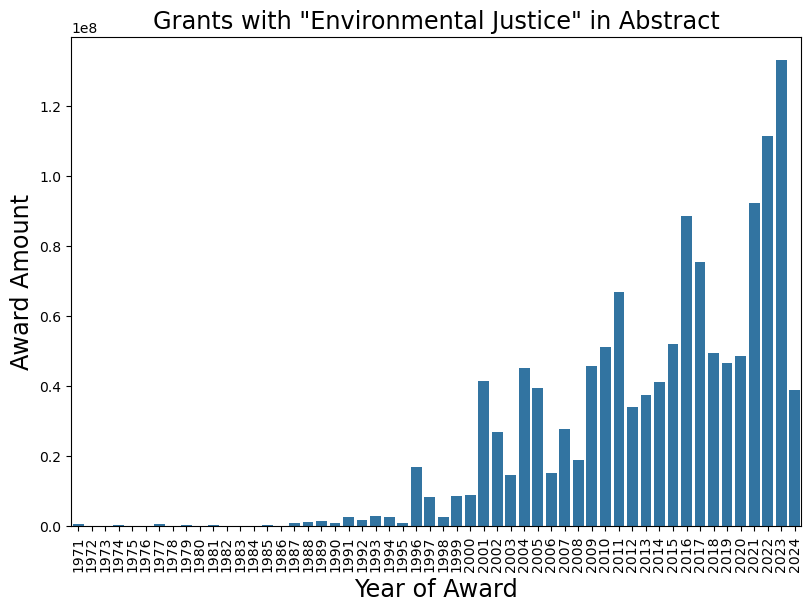

In [56]:
'''Evaluate the changes in the funding amounts associated with the environmental justice and equity '''

fig,sax = plt.subplots(1,1,constrained_layout=True,figsize=(8,6))
df=EJ_df.groupby('syear').sum()
# print(df['AwardedAmountToDate'])
sns.barplot(data=df,
            x='syear',
            y='AwardedAmountToDate',
           ax = sax)
plt.xticks(rotation=90)
plt.xlabel('Year of Award',fontsize='xx-large')
plt.ylabel('Award Amount',fontsize='xx-large')
plt.title('Grants with "Environmental Justice" in Abstract',fontsize='xx-large')
plt.show()
            

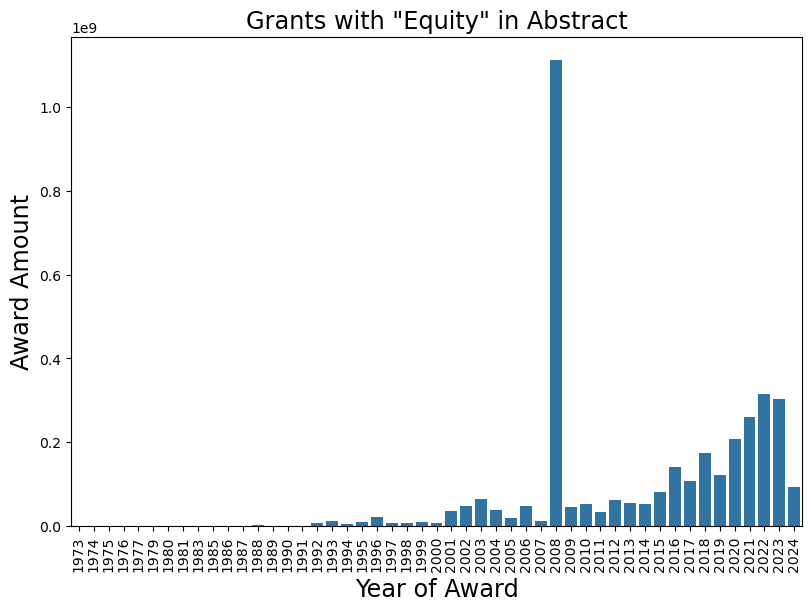

In [57]:
'''Evaluate the changes in the funding amounts associated with the environmental justice and equity '''

fig,sax = plt.subplots(1,1,constrained_layout=True,figsize=(8,6))
df=eq_df.groupby('syear').sum()
# print(df['AwardedAmountToDate'])
sns.barplot(data=df,
            x='syear',
            y='AwardedAmountToDate',
           ax = sax)
plt.xticks(rotation=90)
plt.xlabel('Year of Award',fontsize='xx-large')
plt.ylabel('Award Amount',fontsize='xx-large')
plt.title('Grants with "Equity" in Abstract',fontsize='xx-large')
plt.show()

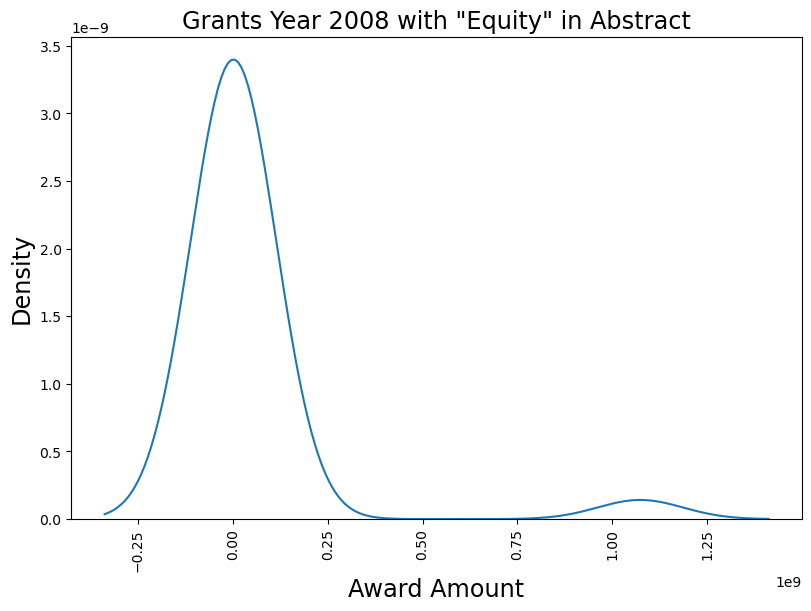

In [58]:
'''Evaluate the changes in the funding amounts associated with the environmental justice and equity '''

fig,sax = plt.subplots(1,1,constrained_layout=True,figsize=(8,6))
df=eq_df[eq_df.syear==2008]
# print(df['AwardedAmountToDate'])
sns.kdeplot(data=df,
            x='AwardedAmountToDate',
           ax = sax)
plt.xticks(rotation=90)
plt.xlabel('Award Amount',fontsize='xx-large')
plt.ylabel('Density',fontsize='xx-large')
plt.title('Grants Year 2008 with "Equity" in Abstract',fontsize='xx-large')
plt.show()

In [ ]:
'''Clean text within the dataframe for evaluation in a wordcloud'''

# Function to clean text data
def clean_text(text):
    # Remove non-alphabetic characters and convert text to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

# Apply the clean_text function to each row in the DataFrame
df['cleaned_text'] = df['AbstractNarration'].apply(clean_text)

# Combine all rows into a single string
combined_text = ' '.join(df['cleaned_text'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()